# Applying k Nearest Neighbors
Reducing the dimensions to capture variation among candidate "nearest neighbors."

## Setup and specifications

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
word_list_version = 7

In [4]:
str(word_list_version)

'7'

In [5]:
# Read in list of words
training_word_classifications = pd.read_csv('wordlist_v' + str(word_list_version) + '.csv')
training_word_classifications.head()

,word,vegan,keto,meat
0,avocado,1,1,0
1,bacon,0,1,1
2,baking-powder,1,1,0
3,baking-soda,1,1,0
4,barley,1,0,0


In [6]:
# To load: all_vectors_word_index_dict, all_vectors_transformed_array, training_words_transformed
all_vectors_word_index_dict = joblib.load("all_vectors_word_index_dict.pkl")
all_vectors_transformed_array = joblib.load("all_vectors_transformed_array.pkl")
training_words_transformed_df = joblib.load("training_words_transformed_df.pkl")

## Applying k nearest neighbors classifier

In [7]:
# Join each word's position with target values (not/vegan, not/keto)
word_positions_transformed_with_categories = training_word_classifications.merge(training_words_transformed_df, how="right", on="word")
word_positions_transformed_with_categories.head()

,word,vegan,keto,meat,0,1,2,3,4
0,avocado,1,1,0,-0.084474,0.036081,0.025121,0.070818,-0.041690
1,bacon,0,1,1,0.079464,0.102724,-0.075510,0.019188,0.001157
2,baking-powder,1,1,0,-0.117417,-0.037822,-0.026220,-0.061549,0.016028
3,barley,1,0,0,-0.046627,-0.047808,-0.024248,0.017874,0.067147
4,basil,1,1,0,-0.149953,0.076276,0.090312,0.027865,-0.026246


In [8]:
word_positions_transformed_with_categories[[0,1]].head()

,0,1
0,-0.084474,0.036081
1,0.079464,0.102724
2,-0.117417,-0.037822
3,-0.046627,-0.047808
4,-0.149953,0.076276


In [9]:
# Isolate criteria into which we sort words as belonging/not belonging
colnames = list(word_positions_transformed_with_categories.columns.values)
criterion_names = [name for name in colnames if name != 'word' and not isinstance(name, int)]
criterion_names

['vegan', 'keto', 'meat']

In [10]:
# Create one KNN classifier for each criterion
knn_classifiers = {}
X = np.array(word_positions_transformed_with_categories[[0,1,2]]) # 3D
for criterion in criterion_names:
    knn_classifiers[criterion] = KNeighborsClassifier(n_neighbors=3, weights="distance")
    knn_classifiers[criterion].fit(X, word_positions_transformed_with_categories[criterion])

In [11]:
knn_classifiers['vegan']

KNeighborsClassifier(n_neighbors=3, weights='distance')

## Visualize kNN classifier in 2D
(Even though we use 3D)

In [12]:
# Create one 2D KNN classifier for each criterion
knn_classifiers_2d = {}
X2D = np.array(word_positions_transformed_with_categories[[0,1]]) # 2D
for criterion in criterion_names:
    knn_classifiers_2d[criterion] = KNeighborsClassifier(n_neighbors=3, weights="distance")
    knn_classifiers_2d[criterion].fit(X2D, word_positions_transformed_with_categories[criterion])

In [13]:
# Set up mesh grid
h = 0.005  # Step size
x_min, x_max = X2D[:, 0].min() - 0.1, X2D[:, 0].max() + 0.1
y_min, y_max = X2D[:, 1].min() - 0.1, X2D[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### Vegan vs. not vegan

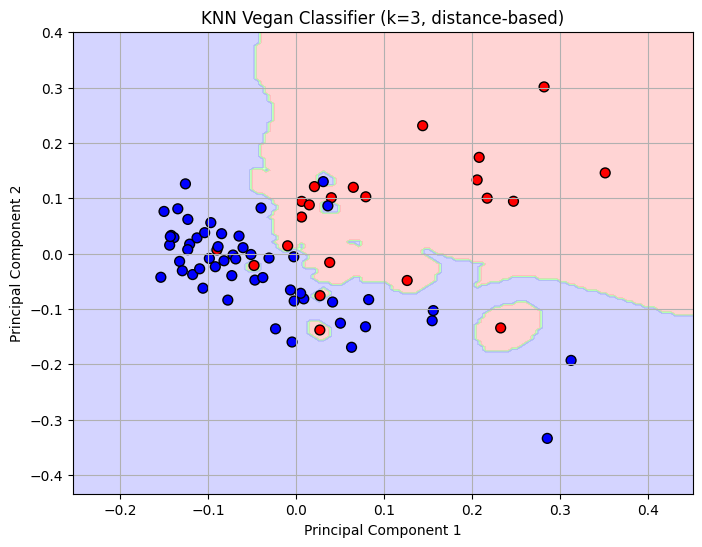

In [32]:
# Predict class for each point in the mesh
Z = knn_classifiers_2d['vegan'].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary. Here, blue is vegan, and red is not vegan.
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X2D[:, 0], X2D[:, 1], c=word_positions_transformed_with_categories['vegan'], cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Vegan Classifier (k=3, distance-based)')
plt.grid(True)
plt.show()

### Keto vs. not keto

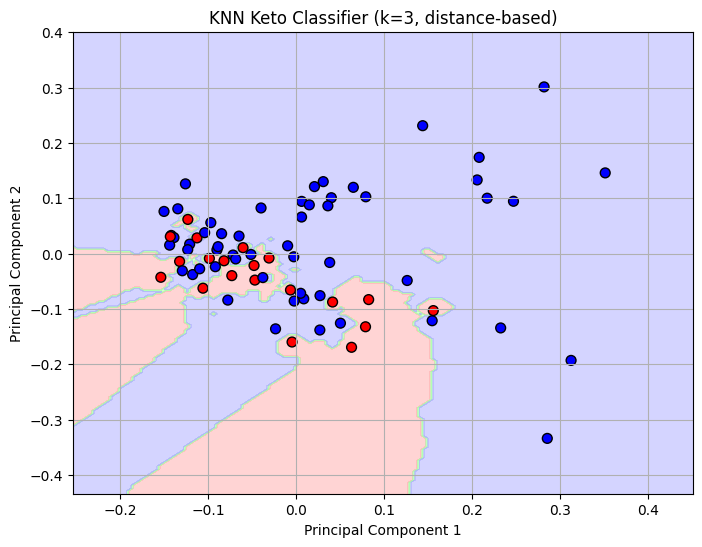

In [33]:
# Predict class for each point in the mesh
Z = knn_classifiers_2d['keto'].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary. Here, blue is keto, and red is not keto.
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X2D[:, 0], X2D[:, 1], c=word_positions_transformed_with_categories['keto'], cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Keto Classifier (k=3, distance-based)')
plt.grid(True)
plt.show()

## Predict where an arbitrary word falls in 2D
(This is an example for visualization purposes, but realistically we want between 3-5 dimensions)

In [18]:
# Decide on a word
test_word = "pepper"

In [19]:
# Project using PCA
test_position = all_vectors_transformed_array[all_vectors_word_index_dict[test_word]]

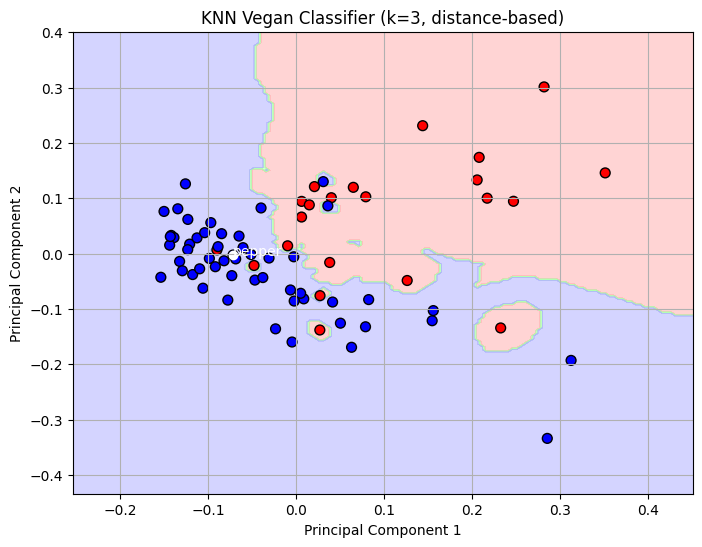

In [34]:
# Predict class for each point in the mesh
Z = knn_classifiers_2d['vegan'].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot training points and decision boundary with additional test point.
# Here, blue is vegan, and red is not vegan.
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X2D[:, 0], X2D[:, 1], c=word_positions_transformed_with_categories['vegan'], cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.scatter(test_position[0], test_position[1], color="white")
plt.text(test_position[0], test_position[1], test_word, color="white")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Vegan Classifier (k=3, distance-based)')
plt.grid(True)
plt.show()

In [21]:
#test_position[0][0:2].reshape(1,-1)

In [22]:
knn_classifiers_2d['vegan'].predict(test_position[0:2].reshape(1,-1))

array([1])

In [23]:
def predict_word_2d(criterion, word):
    if word not in all_vectors_word_index_dict:
        return None
    transformed_word_vector = all_vectors_transformed_array[all_vectors_word_index_dict[word]]
    word_prediction = knn_classifiers_2d[criterion].predict(transformed_word_vector[0:2].reshape(1,-1))
    return word_prediction

In [24]:
# 1 is vegan, 0 is not vegan
predict_word_2d("vegan", "pepper")

array([1])

## Predict where an arbitrary word falls in 3D
(or as many dimensions as we specify in our original classifier)

In [25]:
def predict_word(criterion, word):
    if word not in all_vectors_word_index_dict:
        return None
    transformed_word_vector = all_vectors_transformed_array[all_vectors_word_index_dict[word]]
    word_prediction = knn_classifiers[criterion].predict(transformed_word_vector[0:3].reshape(1,-1))
    return word_prediction

In [26]:
# 1 is vegan, 0 is not vegan
predict_word("vegan", "pepper")

array([1])

## Output kNN models so they can be used in practice

In [27]:
joblib.dump(knn_classifiers, "knn_classifiers.pkl")

['knn_classifiers.pkl']